# Promenade le long de l'ADN

## Implémentation en python

Nous allons dans ce complément voir une version exécutable de l'algorithme de la promenade le long de l'ADN.

que nous venons de voir dans l
On rappelle la co

Je suis parti de W1S7, il s'agit de dessiner une séquence d'ADN si chaque nucléotide `C`,  `A`, `G`, et `T` correspond à une direction comme dans le transparent

![Extrait du transparent](../media/directions.png)

In [2]:
deplacements = {
    'C' : (1, 0),
    'A' : (0, 1),
    'G' : (-1, 0),
    'T' : (0, -1),
    }

De sorte que par exemple

In [3]:
deplacements['C']

(1, 0)

##### L'algo à proprement parler

On choisit de retourner deux listes, correspondant aux X et aux Y respectivement. Il se trouve que le plotter s'attend à ce genre de données; on pourrait très facilement faire un autre choix, je fais au plus rapide.

In [4]:
# un algorithme qui calcule les deux chemins en x et y
# en partant et en se deplaçant le long de la chaine
def chemins_x_y(adn):
    # on commence au centre
    x = 0
    y = 0
    # on range le point
    chemin_x = [x]
    chemin_y = [y]

    # pour tout l'ADN
    for nucleotide in adn:
        # quel deplacement faut-il faire
        dep_x, dep_y = deplacements[nucleotide]
        # on l'applique
        x += dep_x
        y += dep_y
        # on le range
        chemin_x.append(x)
        chemin_y.append(y)

    return chemin_x, chemin_y

Avec un petit exemple que je copie du transparent

In [5]:
adn = "CAGACCACTCAGACCTCAAGGACCCAGAAGTGAACACC"

X, Y = chemins_x_y(adn)

Pour donner une idée de ce que ça donne

In [6]:
for nucleotide, x, y in zip(adn, X[1:], Y[1:]): 
    print("{} ->({},{})".format(nucleotide, x, y), end="")

C ->(1,0)A ->(1,1)G ->(0,1)A ->(0,2)C ->(1,2)C ->(2,2)A ->(2,3)C ->(3,3)T ->(3,2)C ->(4,2)A ->(4,3)G ->(3,3)A ->(3,4)C ->(4,4)C ->(5,4)T ->(5,3)C ->(6,3)A ->(6,4)A ->(6,5)G ->(5,5)G ->(4,5)A ->(4,6)C ->(5,6)C ->(6,6)C ->(7,6)A ->(7,7)G ->(6,7)A ->(6,8)A ->(6,9)G ->(5,9)T ->(5,8)G ->(4,8)A ->(4,9)A ->(4,10)C ->(5,10)A ->(5,11)C ->(6,11)C ->(7,11)

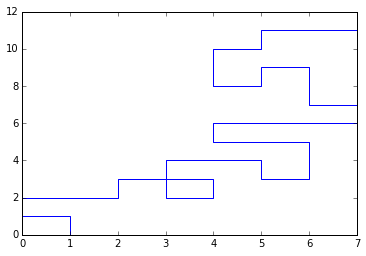

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(X, Y)
plt.show()

### Des entrées + grosses (1)

Je peux fournir des données en python ou en json ou en ce qu'on veut en fait.

Par exemple ceci est pris du même transparent

In [10]:
# au départ je voulais en mettre plusieurs dans ce module
from samples import slides
adn1 = slides['1.7']
print(adn1)

CCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCCATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGACGCGTACAGGAAACACAGAAAAAAGCCCGCACCTGACAGTGCGGGCTTTTTTTTTCGACCAAAGGTAACGAGGTAACAACCATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTGGCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTTTGACGGGACTCGCCGCCGCCCAGCCGGGGTTCCCGCTGGCGCAATTGAAAACTTTCGTCGATCAGGAATTTGCCCAAATAAAACATGTCCTGCATGGCATTAGTTTGTTGGGGCAGTGCCCGGATAGCATCAACGCTGCGCTGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTATTAGAAGCGCGCGGTCACAACGTTACTGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTACCGTCGATATTGCTGAGTCCACCCGCCGTATTGCGGCAAGCCGCATTCCGGCTGATCACATGGTGCTGATGGCAGGTTTCACCGCCGGTAATGAAAAAGGCGAACTGGTGGTGCTTGGACGCAACGGTTCCGACTACTCTGCTGCGGTGCTGGCTGCCTGTTTACGCGCCGATTG

### Des entrées plus grosses (2)

On peut même les générer en python, évidemment

In [11]:
import random
valids = ['C', 'A', 'G', 'T']

In [13]:
longueur = 10**6
gros_adn = [ random.choice(valids) for i in range(longueur)]

en entrée, 1000000 nucleotides


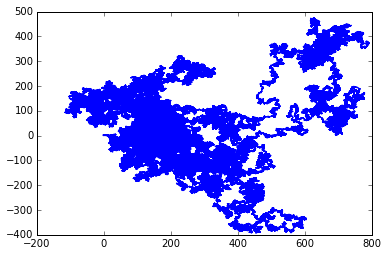

In [14]:
# mais en fait il n'y en a qu'un
for adn in [ gros_adn ]:
    print("en entrée, {} nucleotides".format(len(adn)))
    X, Y = chemins_x_y(adn)
    plt.plot(X, Y)
    plt.show()


Ce qui nous permet au passage de voir que notre générateur aléatoire ne fait trop bien son boulot ;)

******

# En 3D

La même chose en 3D (ça scale sûrement un peu moins)

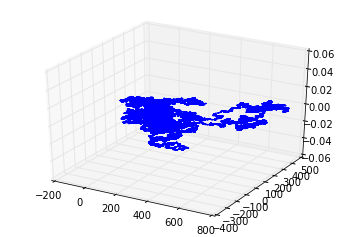

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(X, Y)

### Including `lines3d_demo.py` as-is

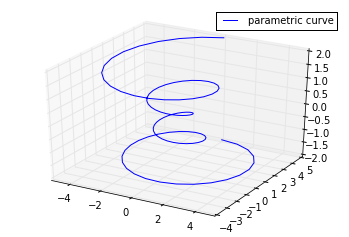

In [16]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()